In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
%matplotlib inline

In [2]:

# Reading the train.csv by removing the
# last column since it's an empty column
data = pd.read_csv("Training.csv").dropna(axis=1)
data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [3]:
diseases=data['prognosis'].value_counts()
temp_df=pd.DataFrame({"Disease":diseases.index,
                      "Counts":diseases.values})
temp_df

,Disease,Counts
0,Fungal infection,120
1,Hepatitis C,120
2,Hepatitis E,120
3,Alcoholic hepatitis,120
4,Tuberculosis,120
5,Common Cold,120
6,Pneumonia,120
7,Dimorphic hemmorhoids(piles),120
8,Heart attack,120
9,Varicose veins,120


In [4]:
temp_df.index

RangeIndex(start=0, stop=41, step=1)

In [5]:
import matplotlib.pyplot as plt

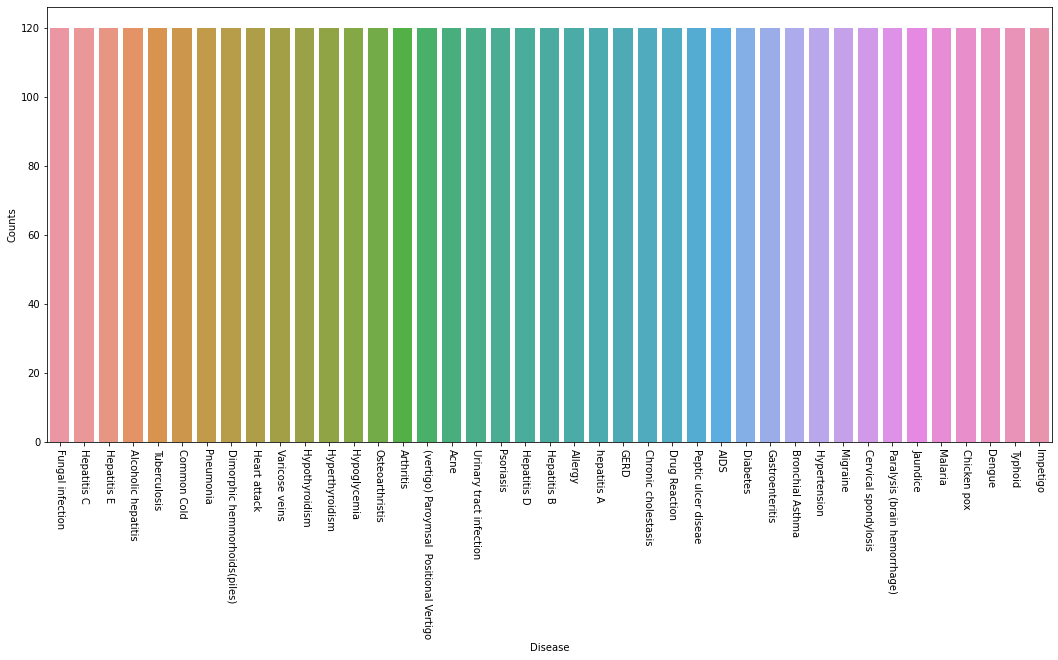

In [6]:
plt.figure(figsize=(18,8))
sns.barplot(x="Disease",y="Counts",data=temp_df)
plt.xticks(rotation=270)
plt.show()

In [7]:
type(data.prognosis[0])

str

In [8]:
type(data['prognosis'][0])

str

In [9]:
data.dtypes

itching                  int64
skin_rash                int64
nodal_skin_eruptions     int64
continuous_sneezing      int64
shivering                int64
                         ...  
inflammatory_nails       int64
blister                  int64
red_sore_around_nose     int64
yellow_crust_ooze        int64
prognosis               object
Length: 133, dtype: object

In [10]:
encoder=LabelEncoder()
data['prognosis']=encoder.fit_transform(data['prognosis'])


In [11]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=24)
print(f"Train:{X_train.shape},{y_train.shape}")
print(f"Test:{X_test.shape},{y_test.shape}")


Train:(3936, 132),(3936,)
Test:(984, 132),(984,)


In [13]:
def cv_score(estimator,X,y):
    return accuracy_score(y,estimator.predict(X))

models={"SVC":SVC(),
       "Gaussian NB":GaussianNB(),
        "Random Forest":RandomForestClassifier(random_state=18)
       }

for model_name in models:
    model=models[model_name]
    scores=cross_val_score(model,X,y,cv=10,n_jobs=-1,scoring=cv_score)

    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")
    

SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


Accuracy on train data by SVM Classifier:100.0
Accuracy on test data by SVM Classifier: 0.032520325203252036


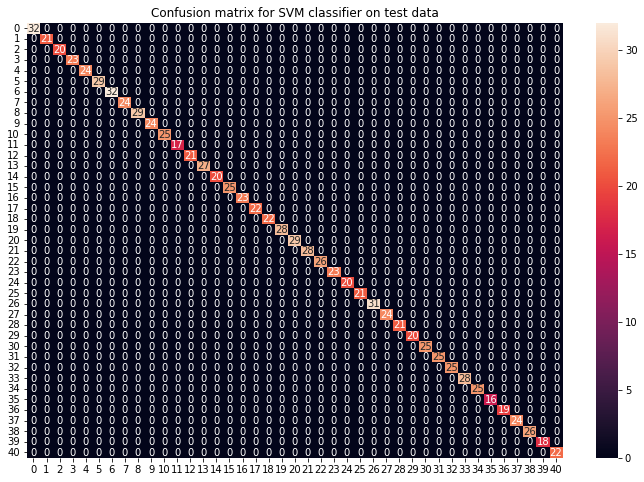

In [14]:
svm_model=SVC()
svm_model.fit(X_train,y_train)
preds=svm_model.predict(X_test)
print(f"Accuracy on train data by SVM Classifier:{accuracy_score(y_train,svm_model.predict(X_train))*100}")
print(f"Accuracy on test data by SVM Classifier: {accuracy_score(y_test,svm_model.predict(X_test)*100)}")
cf_matrix=confusion_matrix(y_test,preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix,annot=True)
plt.title("Confusion matrix for SVM classifier on test data")
plt.show()

Accuracy on train data by Gaussian NB Classifier:100.0
Validation Accuracy on test data by Gaussian NB Classifier: 0.032520325203252036


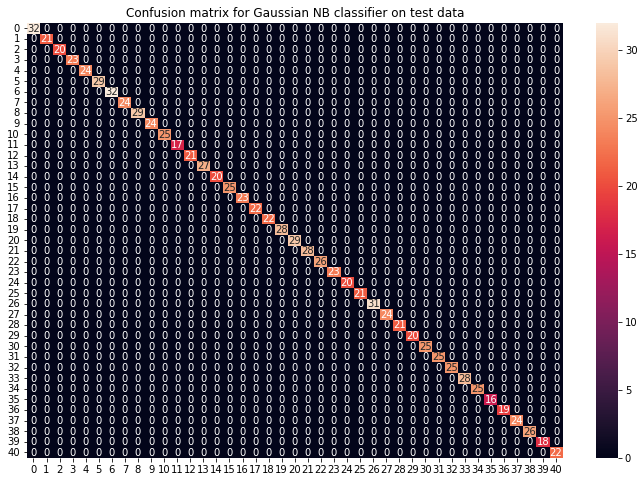

In [15]:
gaussian_NB=GaussianNB()
gaussian_NB.fit(X_train,y_train)
preds=gaussian_NB.predict(X_test)
print(f"Accuracy on train data by Gaussian NB Classifier:{accuracy_score(y_train,gaussian_NB.predict(X_train))*100}")
print(f"Validation Accuracy on test data by Gaussian NB Classifier: {accuracy_score(y_test,gaussian_NB.predict(X_test)*100)}")
cf_matrix=confusion_matrix(y_test,preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix,annot=True)
plt.title("Confusion matrix for Gaussian NB classifier on test data")
plt.show()

Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 100.0


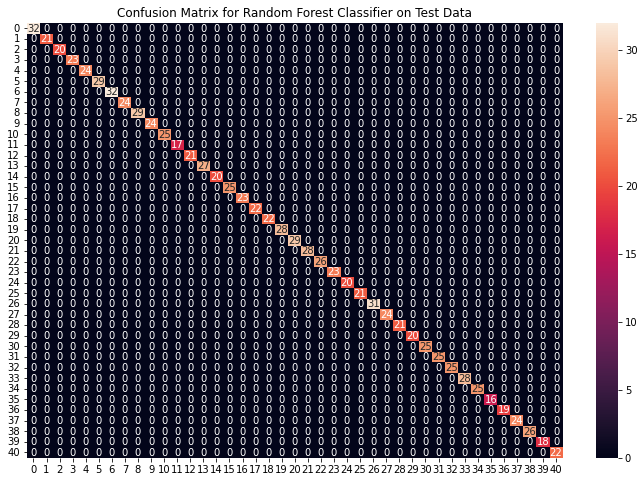

In [16]:

rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(y_train, rf_model.predict(X_train))*100}")
 
print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(y_test, preds)*100}")
 
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

In [29]:
final_svm_model=SVC()
final_gaussian_NB=GaussianNB()
final_rf_model=RandomForestClassifier()
final_svm_model.fit(X,y)
final_gaussian_NB.fit(X,y)
final_rf_model.fit(X,y)
test_data = pd.read_csv("Testing.csv").dropna(axis=1)
test_X=test_data.iloc[:,:-1]
test_y=encoder.transform(test_data.iloc[:,-1])


In [24]:
test_data.pronosis=encoder.transform(test_data.prognosis)

C:\Users\hp\AppData\Local\Temp\ipykernel_21404\2707202254.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test_data.pronosis=encoder.transform(test_data.prognosis)


In [30]:
test_y

array([15,  4, 16,  9, 14, 33,  1, 12, 17,  6, 23, 30,  7, 32, 28, 29,  8,
       11, 37, 40, 19, 20, 21, 22,  3, 36, 10, 34, 13, 18, 39, 26, 24, 25,
       31,  5,  0,  2, 38, 35, 27, 15])

In [91]:
svm_preds=final_svm_model.predict(test_X)
nb_preds=final_gaussian_NB.predict(test_X)
rf_preds=final_rf_model.predict(test_X)


In [92]:
from scipy.stats import mode

In [93]:
final_pred=[mode([i,j,k])[0][0] for i,j,k in zip(svm_preds,nb_preds,rf_preds)]
final_pred

[15,
 4,
 16,
 9,
 14,
 33,
 1,
 12,
 17,
 6,
 23,
 30,
 7,
 32,
 28,
 29,
 8,
 11,
 37,
 40,
 19,
 20,
 21,
 22,
 3,
 36,
 10,
 34,
 13,
 18,
 39,
 26,
 24,
 25,
 31,
 5,
 0,
 2,
 38,
 35,
 27,
 15]

In [95]:
rf_preds

array([15,  4, 16,  9, 14, 33,  1, 12, 17,  6, 23, 30,  7, 32, 28, 29,  8,
       11, 37, 40, 19, 20, 21, 22,  3, 36, 10, 34, 13, 18, 39, 26, 24, 25,
       31,  5,  0,  2, 38, 35, 27, 27])

In [96]:
nb_preds

array([15,  4, 16,  9, 14, 33,  1, 12, 17,  6, 23, 30,  7, 32, 28, 29,  8,
       11, 37, 40, 19, 20, 21, 22,  3, 36, 10, 34, 13, 18, 39, 26, 24, 25,
       31,  5,  0,  2, 38, 35, 27, 15])

In [97]:
svm_preds

array([15,  4, 16,  9, 14, 33,  1, 12, 17,  6, 23, 30,  7, 32, 28, 29,  8,
       11, 37, 40, 19, 20, 21, 22,  3, 36, 10, 34, 13, 18, 39, 26, 24, 25,
       31,  5,  0,  2, 38, 35, 27, 15])

In [98]:
print(f"Accuracy on the test dataset by the combined model: {accuracy_score(test_y,final_pred)*100}")

Accuracy on the test dataset by the combined model: 100.0


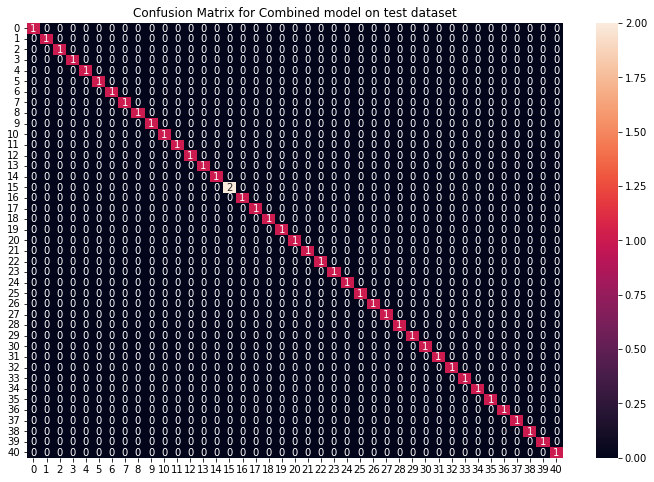

In [99]:
cf_matrix=confusion_matrix(test_y,final_pred)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix,annot=True)
plt.title("Confusion Matrix for Combined model on test dataset")
plt.show()

In [100]:
symptoms=X.columns.values

In [101]:
X

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0


In [65]:
symptoms

array(['itching', 'skin_rash', 'nodal_skin_eruptions',
       'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
       'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting',
       'vomiting', 'burning_micturition', 'spotting_ urination',
       'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets',
       'mood_swings', 'weight_loss', 'restlessness', 'lethargy',
       'patches_in_throat', 'irregular_sugar_level', 'cough',
       'high_fever', 'sunken_eyes', 'breathlessness', 'sweating',
       'dehydration', 'indigestion', 'headache', 'yellowish_skin',
       'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes',
       'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea',
       'mild_fever', 'yellow_urine', 'yellowing_of_eyes',
       'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach',
       'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision',
       'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_press

In [102]:
symptom_index={}

In [103]:
for index,value in enumerate(symptoms):
    symptom=" ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom]=index
print(symptom_index)    

{'Itching': 0, 'Skin Rash': 1, 'Nodal Skin Eruptions': 2, 'Continuous Sneezing': 3, 'Shivering': 4, 'Chills': 5, 'Joint Pain': 6, 'Stomach Pain': 7, 'Acidity': 8, 'Ulcers On Tongue': 9, 'Muscle Wasting': 10, 'Vomiting': 11, 'Burning Micturition': 12, 'Spotting  urination': 13, 'Fatigue': 14, 'Weight Gain': 15, 'Anxiety': 16, 'Cold Hands And Feets': 17, 'Mood Swings': 18, 'Weight Loss': 19, 'Restlessness': 20, 'Lethargy': 21, 'Patches In Throat': 22, 'Irregular Sugar Level': 23, 'Cough': 24, 'High Fever': 25, 'Sunken Eyes': 26, 'Breathlessness': 27, 'Sweating': 28, 'Dehydration': 29, 'Indigestion': 30, 'Headache': 31, 'Yellowish Skin': 32, 'Dark Urine': 33, 'Nausea': 34, 'Loss Of Appetite': 35, 'Pain Behind The Eyes': 36, 'Back Pain': 37, 'Constipation': 38, 'Abdominal Pain': 39, 'Diarrhoea': 40, 'Mild Fever': 41, 'Yellow Urine': 42, 'Yellowing Of Eyes': 43, 'Acute Liver Failure': 44, 'Fluid Overload': 45, 'Swelling Of Stomach': 46, 'Swelled Lymph Nodes': 47, 'Malaise': 48, 'Blurred And

In [104]:
data_dict={
    "symptom_index":symptom_index,
    "predictions_classes":encoder.classes_
}

In [105]:
data['prognosis']

0       15
1       15
2       15
3       15
4       15
        ..
4915     0
4916     2
4917    38
4918    35
4919    27
Name: prognosis, Length: 4920, dtype: int32

In [106]:
print([0]*len(data_dict['symptom_index']))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [114]:
def predict_disease(symptoms):
    symptoms=symptoms.split(",")
    input_data=[0]*len(data_dict['symptom_index'])
    for symptom in symptoms:
        index=data_dict['symptom_index'][symptom]
        input_data[index]=1
    input_data=np.array(input_data).reshape(1,-1)
    print(final_rf_model.predict(input_data)[0])
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][final_gaussian_NB.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]
    final_prediction=mode([rf_prediction,nb_prediction,svm_prediction])[0][0]
    predictions={
        "rf_model_prediction":rf_prediction,
        "naive_bayes_prediction": nb_prediction,
        "svm_model_prediction": svm_prediction,
        "final_prediction":final_prediction
    }
    return predictions
    

In [126]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15


In [128]:
print(predict_disease("Chills,Joint Pain,Acidity"))

4
{'rf_model_prediction': 'Allergy', 'naive_bayes_prediction': 'Allergy', 'svm_model_prediction': 'Allergy', 'final_prediction': 'Allergy'}


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
